In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_excel("Book1.xlsx")
data

,review_tag,processed_reviews
0,Good,yeapreordered july got august package wa nice ...
1,Good,got delivered yesterday used hour tell first m...
2,Good,amazing phone
3,Good,brilliant
4,Good,wa skeptically changing one plus word still pr...
...,...,...
9397,Bad,good
9398,Bad,poor
9399,Bad,bed
9400,Bad,average


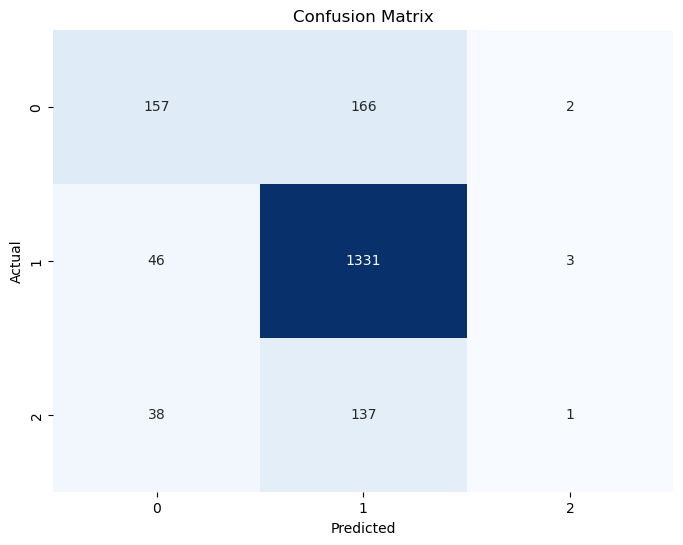

Accuracy: 0.7916002126528442

Classification Report:
               precision    recall  f1-score   support

         Bad       0.65      0.48      0.55       325
        Good       0.81      0.96      0.88      1380
    Moderate       0.17      0.01      0.01       176

    accuracy                           0.79      1881
   macro avg       0.54      0.48      0.48      1881
weighted avg       0.73      0.79      0.74      1881



In [2]:
reviews = data["processed_reviews"]
target = data["review_tag"]

# Step 1: Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words="english"
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, target, test_size=0.2, random_state=42)

# Step 2: Choose and initialize the Naïve Bayes model
naive_bayes_model = MultinomialNB()

# Train the Naïve Bayes model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = naive_bayes_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate classification report
report = classification_report(y_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
